***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [89]:
df = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [90]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [91]:
classes = [0, 788 * 2, 788 * 5, 788 * 15, 788 * 25, 200000]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [92]:
labels = ['E', 'D', 'C', 'B', 'A']
labels 

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [93]:
frequencias = pd.value_counts(
    pd.cut(x = df.Renda,
        bins = classes,
        labels = labels,
        include_lowest=True
    ))
frequencias

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [94]:
percentuais = pd.value_counts(
    pd.cut(x = df.Renda,
           bins = classes,
           labels = labels,
           include_lowest=True
           ),
    normalize=True) * 100 
percentuais

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [95]:
df_classes_renda = pd.DataFrame({'Frequências': frequencias, 'Percentuais': percentuais})
df_classes_renda.sort_index(ascending=False)

,Frequências,Percentuais
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


In [96]:
df_classes_renda = df_classes_renda.rename_axis('Classes').reset_index()

### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

[Text(0, 0.5, '%'), Text(0.5, 1.0, 'Percentual por classe social')]

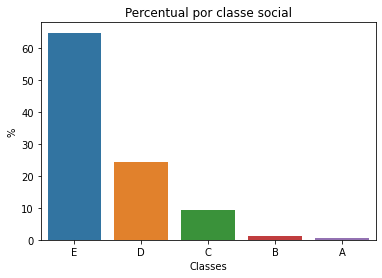

In [97]:
sns.barplot(x='Classes', y='Percentuais', data=df_classes_renda).set(title='Percentual por classe social', ylabel='%')

> ### Conclusões

De acordo com essa pesquisa exploratória, ao isolar as classes sociais e seus dados, fica claro que a classe E é a maior, com mais de 60% de pessoas pertencentes. Já a classe A, ou seja, quem recebe mais de R$ 19.000, tem menos de 1%.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

Text(0.5, 1.0, 'Quantidade de pessoas por idade')

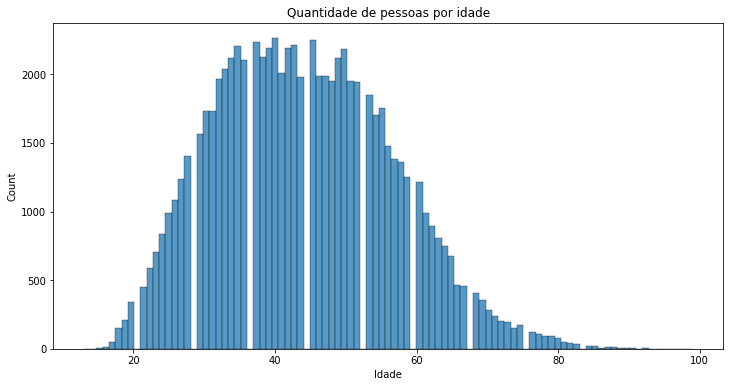

In [98]:
idade_hist = sns.histplot(data=df['Idade'])
idade_hist.figure.set_size_inches(12,6)
idade_hist.set_title('Quantidade de pessoas por idade')

Text(0.5, 1.0, 'Pessoas por altura')

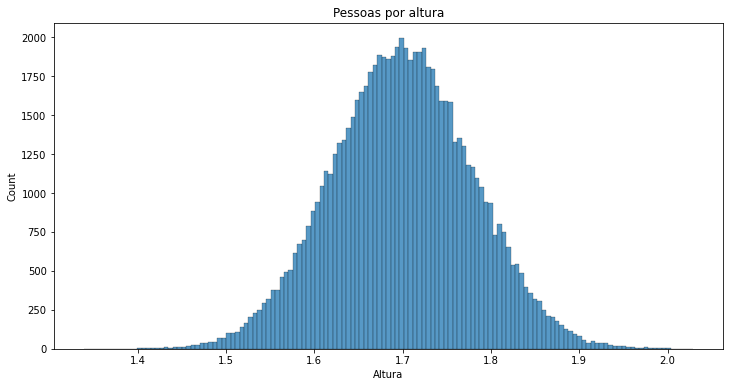

In [99]:
altura_hist = sns.histplot(data=df['Altura'])
altura_hist.figure.set_size_inches(12,6)
altura_hist.set_title('Pessoas por altura')

Text(0.5, 0, 'R$')

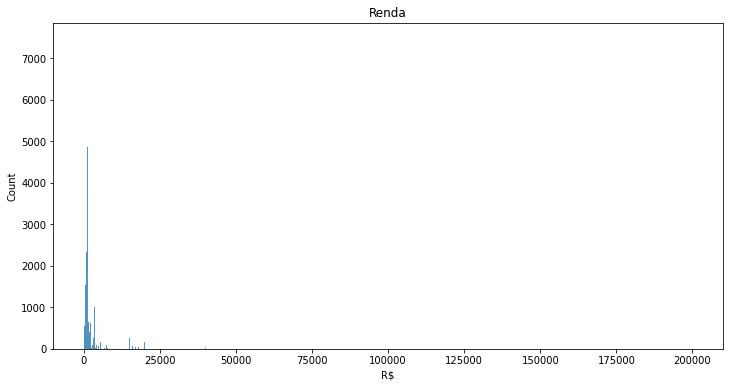

In [100]:
renda_hist = sns.histplot(df.Renda)
renda_hist.figure.set_size_inches(12,6)
renda_hist.set_title('Renda')
renda_hist.set_xlabel('R$')

> ### Conclusões

É possível perceber que o pico das idades dos indivíduos participantes da pesquisa se dá em torno dos 40 anos. Já a altura é, em média 1.70m e a renda se encontra na casa abaixo dos R$ 25.000. Visto que o gráfico lista todos os dados encontrados, é necessário fazer uma análise mais profunda, centralizada, para encontrar a média real.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

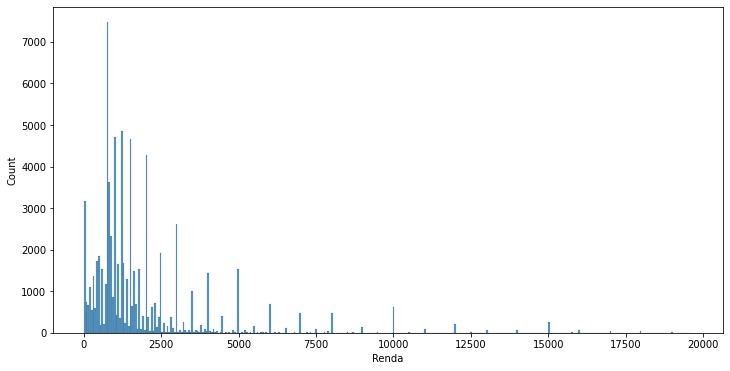

In [101]:
hist = sns.histplot(df.query('Renda < 20000').Renda)
hist.figure.set_size_inches(12, 6)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [102]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [103]:
frequencia_sexo = df['Sexo'].value_counts()
frequencia_sexo

0    53250
1    23590
Name: Sexo, dtype: int64

In [104]:
percentual_sexo = df['Sexo'].value_counts(normalize=True) * 100
percentual_sexo

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [105]:
tabela_sexo = pd.DataFrame({'Frequência': frequencia_sexo, 'Percentual': percentual_sexo})
tabela_sexo.rename(index = sexo, inplace=True)
tabela_sexo

,Frequência,Percentual
Masculino,53250,69.299844
Feminino,23590,30.700156


In [106]:
sexo_cor = pd.crosstab(df.Cor, df.Sexo)
sexo_cor.rename(index=cor, inplace=True)
sexo_cor.rename(columns=sexo, inplace=True)
sexo_cor

Sexo,Masculino,Feminino
Cor,,
Indígena,256,101
Branca,22194,9621
Preta,5502,2889
Amarela,235,117
Parda,25063,10862


In [107]:
sexo_cor = pd.crosstab(df.Cor, df.Sexo, normalize=True) * 100
sexo_cor.rename(index=cor, inplace=True)
sexo_cor.rename(columns=sexo, inplace=True)
sexo_cor

Sexo,Masculino,Feminino
Cor,,
Indígena,0.333160,0.131442
Branca,28.883394,12.520822
Preta,7.160333,3.759761
Amarela,0.305830,0.152264
Parda,32.617126,14.135867


> ### Conclusões

A maior parte dos participantes dessa pesquisa são homens pardos e brancos. Juntos, chegando a ser mais de 50% do total. Como é uma pesquisa voltada aos responsáveis do domicílio, é possível ver quem é essa referência no Brasil.   

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [108]:
df.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [109]:
df.Renda.median()

1200.0

### Obtenha a moda

In [110]:
df.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [111]:
df.Renda.mad()

1526.4951371638058

### Obtenha a variância

In [112]:
df.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [113]:
df.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [114]:
renda_cor_sexo = pd.crosstab(df.Cor, df.Sexo, aggfunc={'mean', 'median', 'max'}, values=df.Renda)
renda_cor_sexo.rename(index=cor, inplace=True)
renda_cor_sexo.rename(columns=sexo, inplace=True)
renda_cor_sexo 

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

A maior média de renda está em homens amarelos, assim como a mediana. As mulheres ficam atrás em qualquer comparação de cor x renda, exceto na indígena. 

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [115]:
disp_sexo_cor = pd.crosstab(df.Cor, df.Sexo, aggfunc={'mad', 'var', 'std'}, values=df.Renda)
disp_sexo_cor.rename(index=cor, inplace=True)
disp_sexo_cor.rename(columns=sexo, inplace=True)
disp_sexo_cor

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

O maior desvio padrão está no grupo de mulheres indígenas, ou seja, é onde há a maior dispersão, está mais longe da média. O menor, se encontra no grupo de mulheres negras, ou seja, com poucas ondulações, discrepâncias de valores.

A variância, repete, com as mulheres indígenas tendo o menor índice, elevado a oito casas decimais.



### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

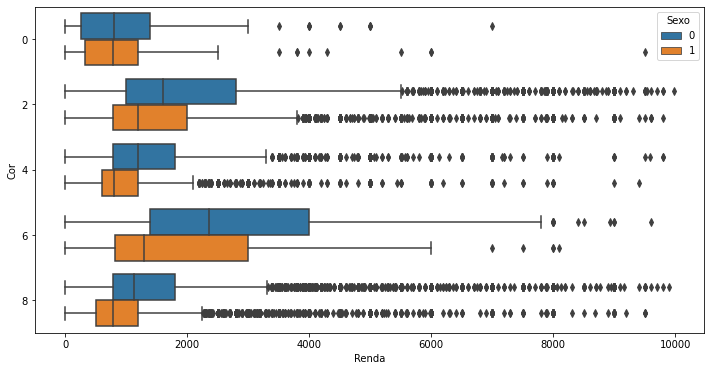

In [116]:
box_renda = sns.boxplot(x='Renda', y='Cor', data= df.query('Renda < 10000'), hue='Sexo', orient='h')
box_renda.figure.set_size_inches(12,6)

> ### Conclusões

A maior concentração de renda está na parcela que recebe até 4.000 reais. Em sua maioria, homens de cor amarela. O número se torna muito disperso em relação a indígenas, no geral. 
Além disso, homens pardos têm certa concentração na faixa de R$ 4.000 para cima. 

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [117]:
from scipy import stats
stats.percentileofscore(df.Renda, 788)

24.390942217595004

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [118]:
df.Renda.quantile([i / 100 for i in range (1, 100)])
# R$ 15.000

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [119]:
ax = pd.crosstab(df['Anos de Estudo'], df['Sexo'], aggfunc=['mean', 'median', 'max', 'std'], values=df.Renda)
ax.rename(columns={'mean': 'média', 'median': 'mediana', 'max': 'valor máximo', 'std': 'desvio padrão'}, inplace=True)
ax.rename(index=anos_de_estudo, inplace=True)
ax.rename(columns=sexo)

média                mediana           \
Sexo                              Masculino     Feminino Masculino Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano   799.494638   516.201748       700      390   
1 ano                            895.629047   492.771987       788      400   
2 anos                           931.178986   529.911638       788      450   
3 anos                          1109.203862   546.853916       800      500   
4 anos                          1302.329283   704.279111      1000      788   
5 anos                          1338.653218   781.389776      1045      788   
6 anos                          1448.875419   833.732824      1200      788   
7 anos                          1465.497940   830.751004      1200      788   
8 anos                          1639.396667   933.615351      1300      800   
9 anos                          1508.038850   868.021700      1200      788   
10 anos                         1731.270847   925.919225      1218      800   
11 anos                         2117.060504  1286.790889      1500     1000   
12 anos                         2470.330776  1682.313725      1800     1200   
13 anos                         3195.099154  1911.730047      2400     1300   
14 anos                         3706.620269  2226.460457      2500     1600   
15 anos ou mais                 6134.279790  3899.513231      4000     2800   
Não determinados                1295.761905   798.174419      1200      788   

                               valor máximo          desvio padrão  \
Sexo                              Masculino Feminino     Masculino   
Anos de Estudo                                                       
Sem instrução e menos de 1 ano        30000    10000   1023.904884   
1 ano                                 30000     2000   1331.950552   
2 anos                                40000     4000   1435.173827   
3 anos                                80000     3500   2143.800133   
4 anos                                50000    10000   1419.821787   
5 anos                                35000     8000   1484.650587   
6 anos                                25000     6000   1476.628602   
7 anos                                40000     9000   1419.708673   
8 anos                                30000    18000   1515.583715   
9 anos                                60000    20000   2137.664774   
10 anos                               45000     6000   2078.609734   
11 anos                              200000   100000   2676.538942   
12 anos                               30000   120000   2268.081538   
13 anos                               25000    20000   2797.116800   
14 anos                               50000    20000   3987.214974   
15 anos ou mais                      200000   100000   7447.613594   
Não determinados                       7000     3000    979.648745   

                                             
Sexo                               Feminino  
Anos de Estudo                               
Sem instrução e menos de 1 ano   639.311534  
1 ano                            425.291842  
2 anos                           498.234168  
3 anos                           424.124446  
4 anos                           629.553397  
5 anos                           635.782641  
6 anos                           574.547028  
7 anos                           602.038029  
8 anos                           896.781213  
9 anos                           973.221652  
10 anos                          620.611907  
11 anos                         1819.040417  
12 anos                         4851.833513  
13 anos                         2053.789771  
14 anos                         2064.083336  
15 anos ou mais                 4212.770709  
Não determinados                 459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

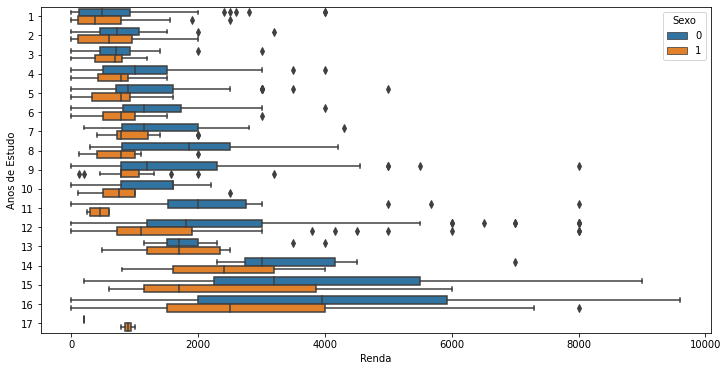

In [120]:
renda_anos = sns.boxplot(data=df.query('Renda < 10000 and Idade == 60'), x='Renda', y='Anos de Estudo', hue='Sexo', orient='h')
renda_anos.figure.set_size_inches(12,6)

> ### Conclusões

Indivíduos com uma renda superior, têm mais anos de estudo, principalmente, quando homens. Mulheres, em sua maioria, nunca possuem a mesma ou similar marca de renda. Também, dependendo da idade observada, ocorre uma maior ou não dispersão de dados. Tendo respostas, por vezes, com renda muito fora da média.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [121]:
renda_fed = df.groupby(['UF']).agg({'Renda':['mean', 'median', 'max', 'std']})
renda_fed.rename(index=uf, inplace=True)
renda_fed.rename(columns={'mean':'média', 'median':'mediana', 'max':'máximo', 'std':'desvio padrão'}, inplace=True)
renda_fed

Renda                              
                           média mediana  máximo desvio padrão
UF                                                            
Rondônia             1789.761223  1200.0   50000   2406.161161
Acre                 1506.091782   900.0   30000   2276.233415
Amazonas             1445.130100   900.0   22000   1757.935591
Roraima              1783.588889  1000.0   20000   2079.659238
Pará                 1399.076871   850.0   50000   2053.779555
Amapá                1861.353516  1200.0   15580   2020.688632
Tocantins            1771.094946  1000.0   60000   2934.590741
Maranhão             1019.432009   700.0   30000   1887.816905
Piauí                1074.550784   750.0   40000   2373.355726
Ceará                1255.403692   789.0   25000   1821.963536
Rio Grande do Norte  1344.721480   800.0   15500   1651.805500
Paraíba              1293.370487   788.0   30000   1950.272431
Pernambuco           1527.079319   900.0   50000   2389.622497
Alagoas              1144.552602   788.0   11000   1237.856197
Sergipe              1109.111111   788.0   16000   1478.997878
Bahia                1429.645094   800.0  200000   3507.917248
Minas Gerais         2056.432084  1200.0  100000   3584.721547
Espírito Santo       2026.383852  1274.0  100000   3513.846868
Rio de Janeiro       2496.403168  1400.0  200000   5214.583518
São Paulo            2638.104986  1600.0   80000   3503.777366
Paraná               2493.870753  1500.0  200000   4302.937995
Santa Catarina       2470.854945  1800.0   80000   3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000   2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000   3031.419122
Mato Grosso          2130.652778  1500.0   35000   2542.630178
Goiás                1994.580794  1500.0   30000   2221.933065
Distrito Federal     4241.954722  2000.0  100000   5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

Text(0.5, 0, 'R$')

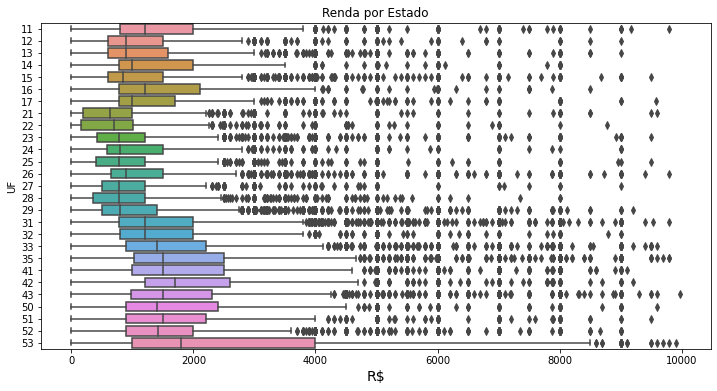

In [122]:
renda_uf_bp = sns.boxplot(data=df.query('Renda < 10000'), x='Renda', y='UF', orient='h')
renda_uf_bp.figure.set_size_inches(12,6)
renda_uf_bp.set_title('Renda por Estado')
renda_uf_bp.set_xlabel('R$', fontsize=14)

> ### Conclusões

O estado com o marcador de renda média (até 10000) mais elevado é o Distrito Federal, marcando até R$ 4000. Já aqueles com menor índice são os estados do Nordeste: Maranhão e Piauí.  No gráfico também é possível que apenas uma unidade federativa alcança o máximo, sendo ela o Rio Grande do Sul, embora a renda média seja bem abaixo do DF.